In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, precision_recall_curve, auc, classification_report
from sklearn.linear_model import RidgeCV
import sys
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
#sys.path.insert(0, '../src')

In [3]:
nc_data2 = pd.read_csv('../data/Hate_crime1/nc_data2_processed_data.csv')

label_encoders = {}
for col in ['OFFENDER_RACE','BIAS_DESC','SEVERITY','POPULATION_GROUP_CODE']:
    le = LabelEncoder()
    nc_data2[col] = le.fit_transform(nc_data2[col])
    label_encoders[col] = le

    # Define your features and target variable

In [4]:
tx_data2 = pd.read_csv('../data/Hate_crime1/tx_data2_processed_data.csv')

label_encoders = {}
for col in ['OFFENDER_RACE','BIAS_DESC','SEVERITY','POPULATION_GROUP_CODE']:
    le = LabelEncoder()
    tx_data2[col] = le.fit_transform(tx_data2[col])
    label_encoders[col] = le

In [12]:
cd_data2 = pd.read_csv('../data/Hate_crime1/combined_data_processed_data.csv')

label_encoders = {}
for col in ['OFFENDER_RACE','BIAS_DESC','SEVERITY','POPULATION_GROUP_CODE']:
    le = LabelEncoder()
    cd_data2[col] = le.fit_transform(cd_data2[col])
    label_encoders[col] = le

    # Define your features and target variable

In [5]:
tx_data2

,Unnamed: 0,INCIDENT_ID,DATA_YEAR,PUB_AGENCY_NAME,STATE_ABBR,STATE_NAME,POPULATION_GROUP_CODE,POPULATION_GROUP_DESC,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,SEVERITY
0,4203,2540,1991,Dallas,TX,Texas,14,"MSA counties from 10,000 thru 24,999",01-SEP-91,1,6,1,Simple Assault,1.0,Jail/Prison/Penitentiary/Corrections Facility,7,Individual,1
1,4204,2411,1991,Dallas,TX,Texas,0,"Cities 1,000,000 or over",25-JAN-91,3,6,1,Aggravated Assault,1.0,Parking/Drop Lot/Garage,7,Individual,1
2,4205,2412,1991,Dallas,TX,Texas,0,"Cities 1,000,000 or over",26-JAN-91,1,6,1,Intimidation,1.0,Convenience Store,1,Individual,1
3,4206,2413,1991,Dallas,TX,Texas,0,"Cities 1,000,000 or over",31-JAN-91,3,3,1,Aggravated Assault,1.0,Other/Unknown,50,Individual,1
4,4207,2414,1991,Dallas,TX,Texas,0,"Cities 1,000,000 or over",24-FEB-91,0,5,1,Destruction/Damage/Vandalism of Property,0.0,Residence/Home,7,Other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8478,218042,1054181,2020,San Antonio,TX,Texas,0,"Cities 1,000,000 or over",02-JUL-20,0,5,1,Intimidation,1.0,Residence/Home,7,Individual,1
8479,218043,1124581,2020,San Antonio,TX,Texas,0,"Cities 1,000,000 or over",27-SEP-20,0,5,1,Intimidation,1.0,Church/Synagogue/Temple/Mosque,32,Individual,1
8480,218044,1220182,2020,San Antonio,TX,Texas,0,"Cities 1,000,000 or over",01-OCT-20,5,3,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,49,Individual,1
8481,218045,1220183,2020,San Antonio,TX,Texas,0,"Cities 1,000,000 or over",10-OCT-20,0,5,1,Intimidation,1.0,Residence/Home,25,Individual,1


In [6]:
nc_data2

,Unnamed: 0,INCIDENT_ID,DATA_YEAR,PUB_AGENCY_NAME,STATE_ABBR,STATE_NAME,POPULATION_GROUP_CODE,POPULATION_GROUP_DESC,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,SEVERITY
0,7277,7474,1992,University of North Carolina:,NC,North Carolina,7,"Cities under 2,500",20-NOV-92,0,4,1,Intimidation,1.0,Hotel/Motel/Etc.,28,Individual,1
1,14709,14462,1993,North Carolina Central University,NC,North Carolina,7,"Cities under 2,500",24-FEB-93,7,2,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,40,Individual,1
2,14710,14463,1993,Winston-Salem,NC,North Carolina,2,"Cities from 100,000 thru 249,999",10-SEP-93,2,5,1,Aggravated Assault,1.0,Hotel/Motel/Etc.,6,Individual,1
3,14711,14464,1993,Gastonia,NC,North Carolina,3,"Cities from 50,000 thru 99,999",27-JAN-93,14,2,1,Aggravated Assault,1.0,School/College,40,Individual,1
4,14712,14465,1993,Gastonia,NC,North Carolina,3,"Cities from 50,000 thru 99,999",25-JUN-93,1,2,8,Aggravated Assault;Destruction/Damage/Vandalis...,4.0,Highway/Road/Alley/Street/Sidewalk,40,Government;Individual,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,214566,1320829,2020,Boone,NC,North Carolina,5,"Cities from 10,000 thru 24,999",29-OCT-20,2,3,2,Aggravated Assault,2.0,Highway/Road/Alley/Street/Sidewalk,6,Individual,1
2844,214567,1313826,2020,Wayne,NC,North Carolina,12,"MSA counties from 25,000 thru 99,999",30-MAY-20,0,4,1,Destruction/Damage/Vandalism of Property,1.0,Residence/Home,40,Individual,0
2845,214568,1321027,2020,Yadkin,NC,North Carolina,12,"MSA counties from 25,000 thru 99,999",05-NOV-20,1,2,1,Simple Assault,1.0,Commercial/Office Building,40,Individual,1
2846,214569,1321030,2020,Yadkin,NC,North Carolina,12,"MSA counties from 25,000 thru 99,999",12-DEC-20,1,5,2,Aggravated Assault;Simple Assault,2.0,Residence/Home,16,Individual,1


In [7]:
def calculate_percentage(x):
    return (x.sum() / nc_data2['INCIDENT_ID'].sum()) * 100


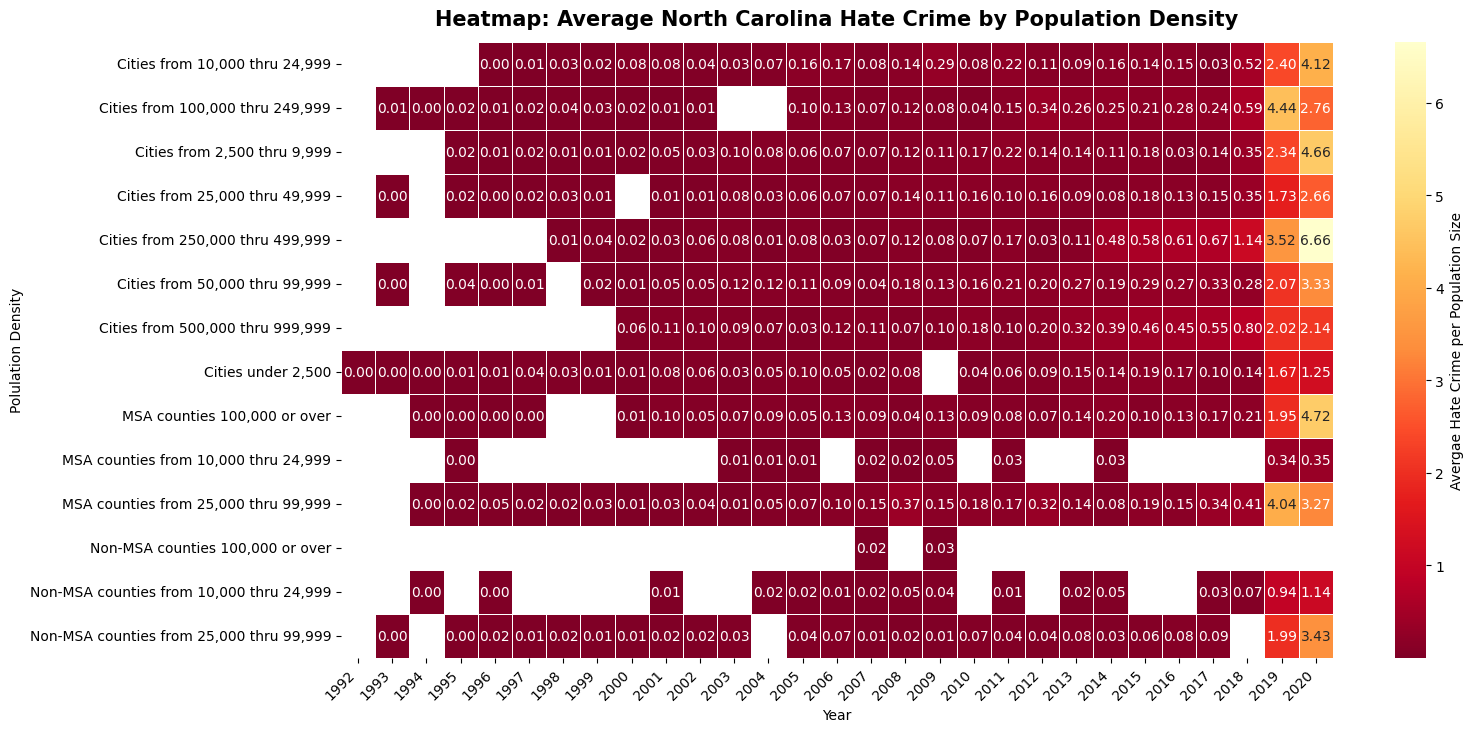

In [8]:
heatmap_data = nc_data2.pivot_table(index='POPULATION_GROUP_DESC', columns='DATA_YEAR', values='INCIDENT_ID', aggfunc=calculate_percentage)

plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd_r', annot=True, fmt='.2f', linewidths=0.7, cbar_kws={'label': 'Avergae Hate Crime per Population Size'})#, vmin=nc_data2['INCIDENT_ID'].min(), vmax=nc_data2['INCIDENT_ID'].max())
plt.xlabel('Year')
plt.ylabel('Polulation Density')
plt.xticks(rotation=45, ha='right')
plt.title('Heatmap: Average North Carolina Hate Crime by Population Density', pad=12, fontsize=15, fontweight='bold')
plt.show()

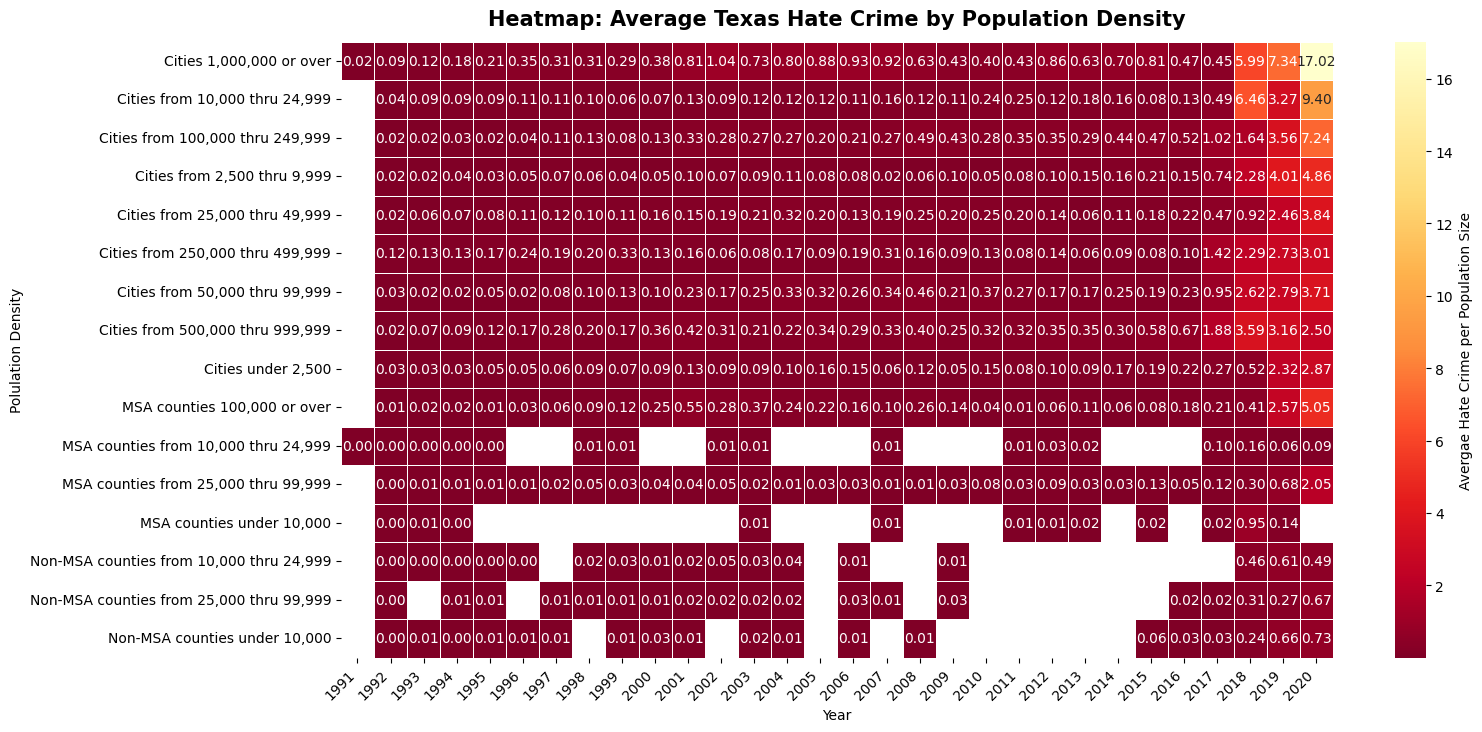

In [9]:
heatmap_data = tx_data2.pivot_table(index='POPULATION_GROUP_DESC', columns='DATA_YEAR', values='INCIDENT_ID', aggfunc = calculate_percentage)

plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd_r', annot=True, fmt='.2f', linewidths=0.7, cbar_kws={'label': 'Avergae Hate Crime per Population Size'})#, vmin=tx_data2['INCIDENT_ID'].min(), vmax=tx_data2['INCIDENT_ID'].max())
plt.xlabel('Year')
plt.ylabel('Polulation Density')
plt.xticks(rotation=45, ha='right')
plt.title('Heatmap: Average Texas Hate Crime by Population Density', pad=12, fontsize=15, fontweight='bold')
plt.show()

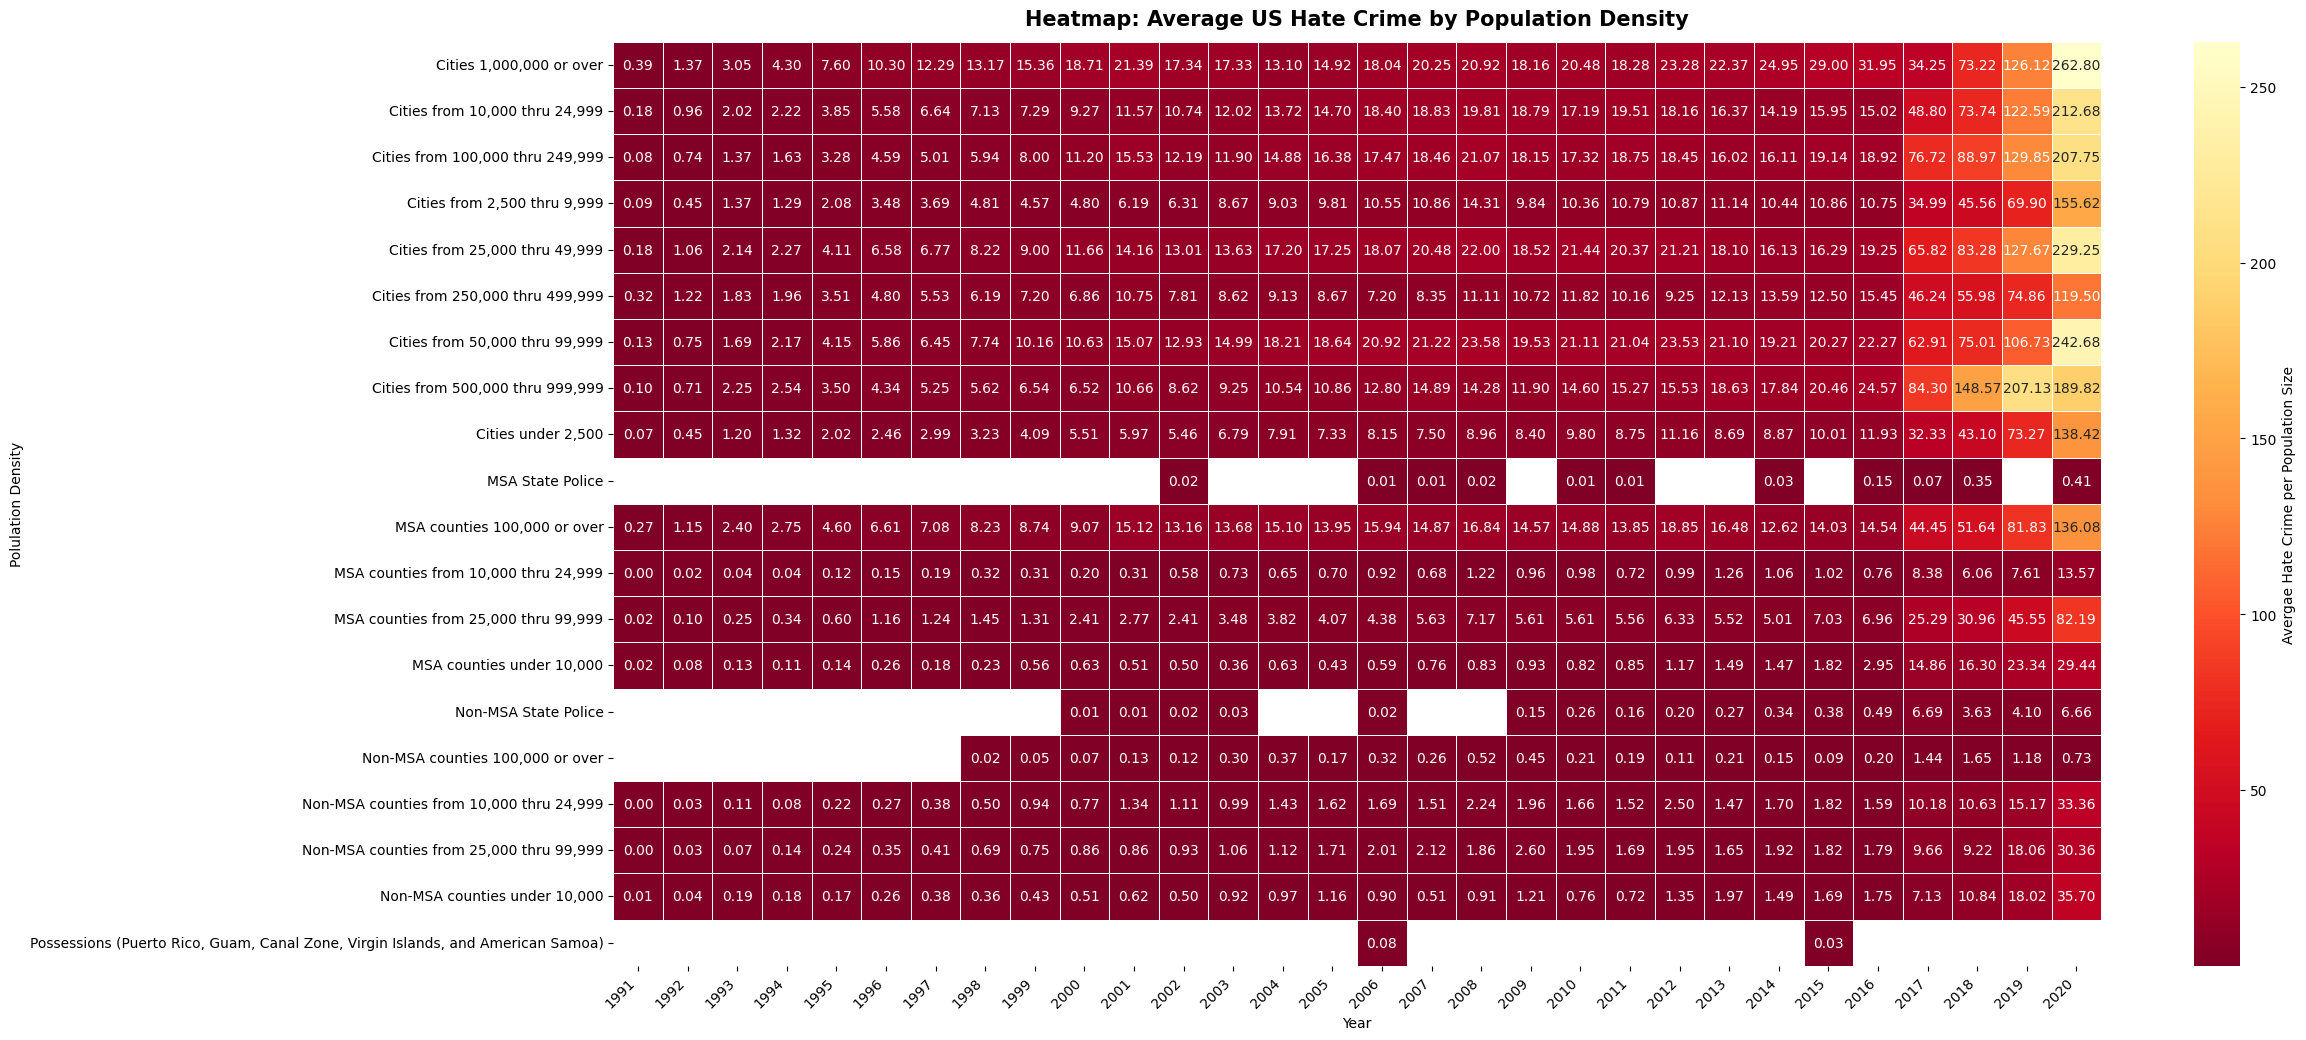

In [15]:
heatmap_data = cd_data2.pivot_table(index='POPULATION_GROUP_DESC', columns='DATA_YEAR', values='INCIDENT_ID', aggfunc=calculate_percentage)

plt.figure(figsize=(24, 12))
sns.heatmap(heatmap_data, cmap='YlOrRd_r', annot=True, fmt='.2f', linewidths=0.7, cbar_kws={'label': 'Avergae Hate Crime per Population Size'})#, vmin=nc_data2['INCIDENT_ID'].min(), vmax=nc_data2['INCIDENT_ID'].max())
plt.xlabel('Year')
plt.ylabel('Polulation Density')
plt.xticks(rotation=45, ha='right')
plt.title('Heatmap: Average US Hate Crime by Population Density', pad=12, fontsize=15, fontweight='bold')
plt.show()